This notebook shows how to use the built-in functionality of plotting submap insets on a map around a specified region.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import regions

from aia_lightcurves import plotting
from aia_lightcurves.Observation import u
from aia_lightcurves.data_classes import RegionCanister

Specify the input file:

In [2]:
fits_path = 'path/to/file.fits'

The method is called `plot_inset_region` and can be found in the `plotting` module.
Here we define a region of interest and plot it in an inset submap.

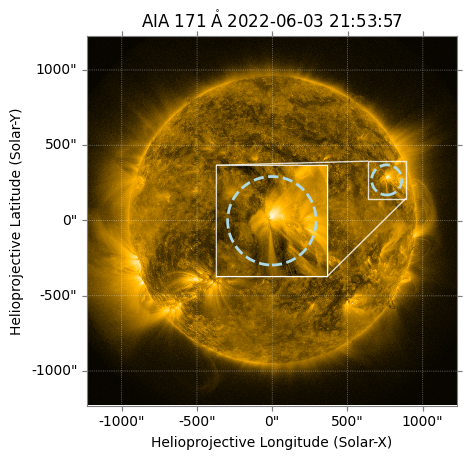

In [3]:
reg1_can = RegionCanister(
    kind=regions.CircleSkyRegion,
    center=(760, 270) * u.arcsec,
    constructor_kwargs=dict(radius = 100 * u.arcsec)
)

d = plotting.plot_inset_region(
    fits_path,
    reg1_can
)

The position of the inset can be specified using the `inset_position` argument in `plot_inset_region`.
The input must be some iterable ordered as follows: (bottom left x, bottom left y, width, height).
There are two ways of specifying the position of the inset:
1. Fraction of the plotting area
2. Map coordinates

Here we specify the position using the fraction of the plotting area.

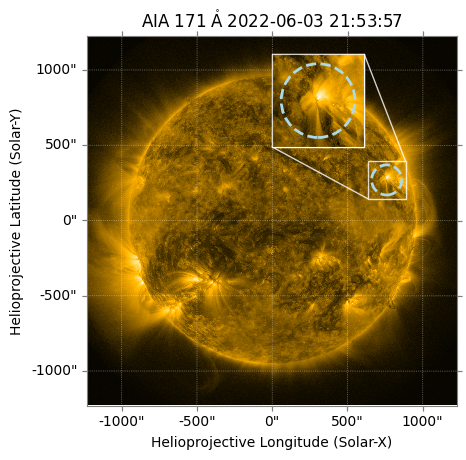

In [4]:
pos = (
    0.5,  # bottom left x
    0.7,  # bottom left y
    0.25, # width
    0.25  # height
)

d = plotting.plot_inset_region(
    fits_path,
    reg1_can,
    inset_position=pos
)

Here we specify the position using map coordinates.

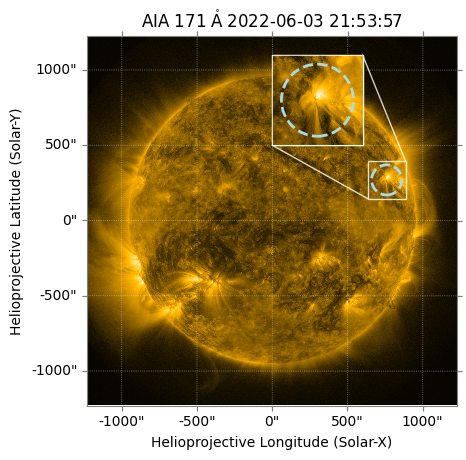

In [5]:
pos = (
    0 * u.arcsec,   # bottom left x
    500 * u.arcsec, # bottom left y
    600 * u.arcsec, # width
    600 * u.arcsec  # height
)

d = plotting.plot_inset_region(
    fits_path,
    reg1_can,
    inset_position=pos
)

By specifying the `fig` and `ax` arguments, multiple insets can be plotted on the same map.

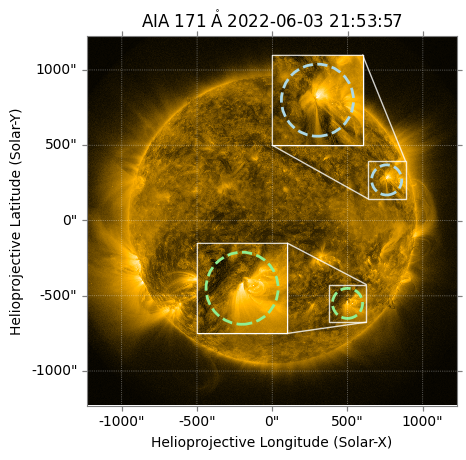

In [6]:
reg2_can = RegionCanister(
    kind=regions.CircleSkyRegion,
    center=(500, -550) * u.arcsec,
    constructor_kwargs=dict(radius = 100 * u.arcsec)
)

pos = (
    -500 * u.arcsec, # bottom left x
    -750 * u.arcsec, # bottom left y
    600 * u.arcsec,  # width
    600 * u.arcsec   # height
)

d = plotting.plot_inset_region(
    fits_path,
    reg2_can,
    fig=d['fig'],
    ax=d['ax'],
    reg_kw=dict(color='lightgreen'),
    inset_position=pos
)
d['fig'] # Shows the updated figure in the notebook